In [1]:
import FunctionsLibrary as fn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Neural Network Classification

## Wisconsin Breast Cancer Data

In [2]:
# Breast Cancer data
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# One-hot encoded
Y = fn.to_categorical_numpy(y)

# Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

# Scaling
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
X_test_scaled.T.shape

(30, 114)

In [4]:
n_categories = Y.shape[1]
n_features = X.shape[1]
print("Number of categories:", n_categories)
print("Number of features:", n_features)

Number of categories: 2
Number of features: 30


In [5]:
hidden_layers = [('relu',0),('relu',0.01),'softmax']
layer_dims=[n_features,6,4,n_categories]
NNclassifier = fn.NN(layer_dims=layer_dims,
                     hidden_layers=hidden_layers,
                     cost_function="CrossEntropy",
                     optimization_method = "SGDM",
                     batch_size = 32,
                     max_epoch=100, 
                     verbose=1, 
                     #penalty="l2",
                     lamb=0.001,
                     learning_rate=0.1)

In [6]:
NNclassifier.fit(X_train_scaled.T,Y_train.T)

Initilizing Weights...
Starting Training...
Cost function after epoch 10: 0.054099372907076906
Cost function after epoch 20: 0.04458232771522344
Cost function after epoch 30: 0.03825026054358599
Cost function after epoch 40: 0.033044942080193505
Cost function after epoch 50: 0.027785740610887726
Cost function after epoch 60: 0.02364349045637484
Cost function after epoch 70: 0.02074664947730354
Cost function after epoch 80: 0.017901933165829675
Cost function after epoch 90: 0.015492492282335204
Cost function after epoch 100: 0.01351775498063302


Text(0.5, 1.0, 'Loss and accuracy after each epoch')

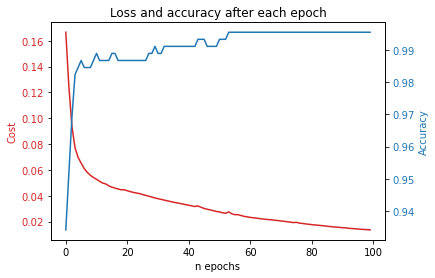

In [7]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(NNclassifier.costs,color=color, label="Cost function")
ax1.set_xlabel("n epochs")
ax1.set_ylabel("Cost",color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(NNclassifier.acc, label="accuracy",color=color)
ax2.set_ylabel("Accuracy",color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Loss and accuracy after each epoch")


In [8]:
Y_tilde = NNclassifier.predict(X_train_scaled.T)
Y_pred = NNclassifier.predict(X_test_scaled.T)

NN_train_acc = fn.accuracy(Y_train, np.argmax(Y_tilde, axis=0))
NN_test_acc = fn.accuracy(Y_test, np.argmax(Y_pred, axis=0))
print("NN Training accuracy: %.3f" % NN_train_acc )
print("NN Testing accuracy: %.3f" % NN_test_acc )

NN Training accuracy: 0.996
NN Testing accuracy: 0.974


## Loading the MNIST data base

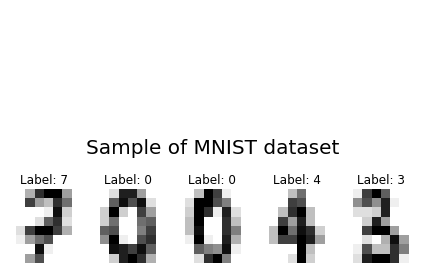

In [9]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)

# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.suptitle(" \n\n\n\n\n\nSample of MNIST dataset", fontsize=20)
plt.tight_layout()
plt.show()


In [10]:
X = inputs
Y = fn.to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

# Reshaping to fit into the Neural Network
X_train, X_test = X_train.T, X_test.T
Y_train, Y_test = Y_train.T, Y_test.T

### Setting up the NN for classification

In [11]:
hidden_layers = [('relu',0),('relu',0.001),'softmax']
layer_dims=[n_features,20,10,n_categories]

NNclassifier = fn.NN(layer_dims=layer_dims, 
                     hidden_layers=hidden_layers, 
                     cost_function='CrossEntropy',
                     optimization_method = "SGDM",
                     batch_size = 32, 
                     max_epoch=100, 
                     penalty="l2",
                     lamb=0,
                     verbose=1, 
                     learning_rate=0.05)

In [12]:
NNclassifier.fit(X_train, Y_train)

Initilizing Weights...
Starting Training...
Cost function after epoch 10: 2.2990099303106812
Cost function after epoch 20: 2.29399110257473
Cost function after epoch 30: 2.289231681858506
Cost function after epoch 40: 1.938966641734024
Cost function after epoch 50: 1.677891855982352
Cost function after epoch 60: 0.7073458738846923
Cost function after epoch 70: 0.4206837031989239
Cost function after epoch 80: 0.19597293042256747
Cost function after epoch 90: 0.09562341691986753
Cost function after epoch 100: 0.11372473538533892


Text(0.5, 1.0, 'Loss and accuracy after each epoch')

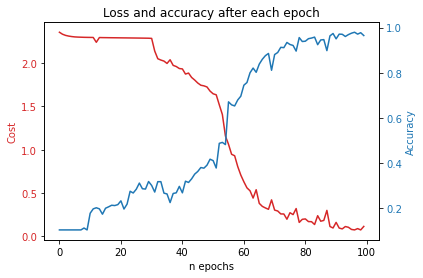

In [13]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(NNclassifier.costs,color=color, label="Cost function")
ax1.set_xlabel("n epochs")
ax1.set_ylabel("Cost",color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(NNclassifier.acc, label="accuracy",color=color)
ax2.set_ylabel("Accuracy",color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Loss and accuracy after each epoch")


In [14]:
Y_tilde = NNclassifier.predict(X_train)
Y_pred = NNclassifier.predict(X_test)

NN_train_acc = fn.accuracy(Y_train.T, np.argmax(Y_tilde, axis=0))
NN_test_acc = fn.accuracy(Y_test.T, np.argmax(Y_pred, axis=0))
print("NN Training accuracy: %.3f" % NN_train_acc )
print("NN Testing accuracy: %.3f" % NN_test_acc )

NN Training accuracy: 0.965
NN Testing accuracy: 0.931


### Dependance of MNIST NN on different increasing l2 penalty term

In [15]:
# Looping over different lambdas
lamb_array = np.logspace(-5,3,40)
mean_counter = 20
train_acc = np.zeros(lamb_array.shape)
test_acc = np.zeros(lamb_array.shape)

hidden_layers = [('relu',0),('relu',0.001),'softmax']
layer_dims=[n_features,20,10,n_categories]
for i in range(len(lamb_array)):
    NNclassifier = fn.NN(layer_dims=layer_dims, 
                         hidden_layers=hidden_layers, 
                         cost_function='CrossEntropy',
                         optimization_method = "Adam",
                         batch_size = 32, 
                         max_epoch=300, 
                         penalty="l2",
                         lamb=lamb_array[i],
                         verbose=0, 
                         learning_rate=0.001)
    NNclassifier.fit(X_train, Y_train)
    Y_tilde = NNclassifier.predict(X_train)
    Y_pred = NNclassifier.predict(X_test)
    train_acc[i] = fn.accuracy(Y_train.T, np.argmax(Y_tilde, axis=0))
    test_acc[i] = fn.accuracy(Y_test.T, np.argmax(Y_pred, axis=0))



KeyboardInterrupt: 

In [ ]:
plt.plot(lamb_array, train_acc, label="Training Accuracy")
plt.plot(lamb_array, test_acc, label="Testing Accuracy")
plt.xscale("log")
plt.ylabel("Accuracy")
plt.xlabel("Penalty Term")
plt.ylim(0,1.1)
plt.legend()

## Testing more intercatively with showing example image and then feeding it into the Neural Network

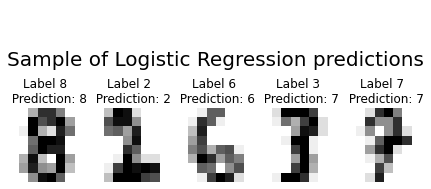

In [16]:
## Selecting a figure
indices = np.arange(len(X_test.T))
entries = 5
random_indices = np.random.choice(indices, size=entries)

testing = X_test.T
fig = plt.figure()
for i, img in enumerate(testing[random_indices]):
    plt.subplot(1, entries, i+1)
    plt.axis('off')
    plt.imshow(img.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    pred_int = np.argmax(NNclassifier.predict(img.reshape(-1,1)), axis=0)[0]
    label_digit = np.argmax(Y_test[:,random_indices[i]], axis=0)
    plt.title("Label %d \n Prediction: %i" % (label_digit,np.int(pred_int)))
plt.tight_layout()
fig.suptitle("\n\nSample of Logistic Regression predictions", fontsize=20)
plt.show()

# Logistic regression on the MNIST data

In [17]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)


X = inputs
Y = fn.to_categorical_numpy(labels)
n_features = X.shape[1]
n_categories = Y.shape[1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [18]:
X.shape

(1797, 64)

### Scaling the data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Creating the model and fitting the data into the Multi-Class Logistic Regression Classifier

C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:91: RuntimeWarning: overflow encountered in exp
  cost = -np.sum( np.multiply(y,X.dot(beta))-np.log(np.ones((N,C))+np.exp(X.dot(beta)) ))/N
C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:339: RuntimeWarning: overflow encountered in exp
  return np.where(X >= 0, 1 / (1 + np.exp(-X)), np.exp(X) / (1 + np.exp(X)))
C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:339: RuntimeWarning: invalid value encountered in true_divide
  return np.where(X >= 0, 1 / (1 + np.exp(-X)), np.exp(X) / (1 + np.exp(X)))


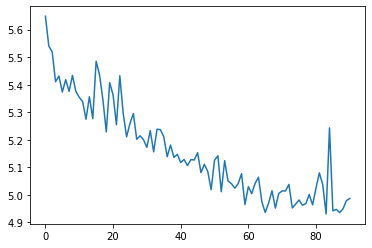

In [20]:

logit_mnist = fn.logisticmulticlass(X_train_scaled, Y_train,
                                    optimizer=["SGD"],
                                    learning_rate = 0.01, 
                                    batch_size = 32,
                                    max_epoch=200,
                                    penalty="l2",
                                    lamb=0.0001)

logit_mnist.fit(X_train_scaled, Y_train)
plt.plot(np.arange(200),logit_mnist.costs)


In [21]:
logit_mnist.costs

[5.6487689945775195,
 5.5405997770680315,
 5.5191019104831165,
 5.410616835234721,
 5.431185532330466,
 5.373232207741475,
 5.418259485611346,
 5.375511777674054,
 5.433653464139553,
 5.375895264974463,
 5.354286330265401,
 5.338631171262498,
 5.274323941884592,
 5.356320183868027,
 5.276245750648849,
 5.485182965504809,
 5.435991737281243,
 5.345459010653167,
 5.2283635703037055,
 5.407158270463028,
 5.363563705496799,
 5.254381410570785,
 5.432179232171909,
 5.2952395516146264,
 5.210385606420978,
 5.259090568046205,
 5.2950177127689155,
 5.201659970192081,
 5.2141107044325485,
 5.19991227650064,
 5.172347618952692,
 5.233016596960723,
 5.155993569462802,
 5.2381377874672435,
 5.236436743367554,
 5.210402457907056,
 5.138136643289622,
 5.180537324372698,
 5.135888359205288,
 5.1468580412552605,
 5.117108442832214,
 5.128281795434602,
 5.105785262083265,
 5.127667079290989,
 5.1263714949303045,
 5.152763109214552,
 5.080196461102935,
 5.110596196434469,
 5.084593746004804,
 5.01829573

In [22]:
Y_tilde = logit_mnist.predict(X_train_scaled)
Y_pred = logit_mnist.predict(X_test_scaled)

logist_train_acc = fn.accuracy(Y_train, np.argmax(Y_tilde, axis=1))
logist_test_acc = fn.accuracy(Y_test, np.argmax(Y_pred, axis=1))
print("Logistic Training accuracy: %.3f" % logist_train_acc )
print("Logistic accuracy: %.3f" % logist_train_acc )

Logistic Training accuracy: 0.914
Logistic accuracy: 0.914


C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:339: RuntimeWarning: overflow encountered in exp
  return np.where(X >= 0, 1 / (1 + np.exp(-X)), np.exp(X) / (1 + np.exp(X)))
C:\Users\hakon\Documents\GitHub\FYS-STK4155AUTUMN\Project 2\FunctionsLibrary.py:339: RuntimeWarning: invalid value encountered in true_divide
  return np.where(X >= 0, 1 / (1 + np.exp(-X)), np.exp(X) / (1 + np.exp(X)))


### Comparing with sci-kit learn implementation

In [23]:
from sklearn.linear_model import LogisticRegression
scikit_logreg = LogisticRegression()
clf = scikit_logreg.fit(X_train_scaled, np.argmax(Y_train, axis=1))

In [24]:
Y_tilde_scikit = scikit_logreg.predict(X_train_scaled)
Y_pred_scikit = scikit_logreg.predict(X_test_scaled)

train_acc_scikit = fn.accuracy(Y_train, Y_tilde_scikit)
test_acc_scikit = fn.accuracy(Y_test, Y_pred_scikit)
print("SciKit Learn Logistic Training accuracy: %.3f" % train_acc_scikit )
print("SciKit Learn Logistic accuracy: %.3f" % test_acc_scikit )

SciKit Learn Logistic Training accuracy: 0.999
SciKit Learn Logistic accuracy: 0.981


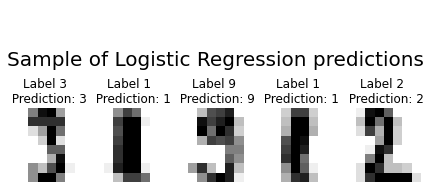

In [34]:
indices = np.arange(len(X_test.T))
entries = 5
random_indices = np.random.choice(indices, size=entries)
fig = plt.figure()
for i, img in enumerate(X_test[random_indices,:]):
    plt.subplot(1, entries, i+1)
    plt.axis('off')
    plt.imshow(img.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    prediction = logit_mnist.predict(img)
    pred_int = np.argmax(prediction, axis=0)
    label_digit = np.argmax(Y_test[random_indices[i],:], axis=0)
    plt.title("Label %d \n Prediction: %i" % (label_digit,np.int(pred_int)))
plt.tight_layout()
fig.suptitle("\n\nSample of Logistic Regression predictions", fontsize=20)
plt.show()

# Using the same class for regression:

In [125]:
import FunctionsLibrary as fn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [126]:
datapoints  = 100
noisefactor = 0
x, y = np.linspace(0,1,datapoints), np.linspace(0,1,datapoints)
x, y = np.meshgrid(x,y) 
z = fn.FrankeFunction(x,y,noisefactor=noisefactor)

In [127]:
X = np.array([np.ravel(x), np.ravel(y)])
z = z.reshape(1,datapoints**2) 

n_features = X.shape[0]
n_categories = 1

In [156]:
NNregression = fn.NN(layer_dims=[X.shape[0],10,10,1], 
                      hidden_layers=["sigmoid","sigmoid","linear"],
                      cost_function="MSE", optimization_method = "Adam",
                      batch_size = 32, max_epoch=100, 
                      verbose=1, learning_rate=0.05)

In [157]:
NNregression.fit(X,z)

Initilizing Weights...
Starting Training...
Cost function after epoch 10: 11.333077012945344
Cost function after epoch 20: 2.876128466890494
Cost function after epoch 30: 1.7652651428056907
Cost function after epoch 40: 1.4841335517322987
Cost function after epoch 50: 0.8185276260787184
Cost function after epoch 60: 0.5540931897802258
Cost function after epoch 70: 1.0042449948008092
Cost function after epoch 80: 1.016879680920284
Cost function after epoch 90: 0.7912261854262029
Cost function after epoch 100: 0.3882867034526737


Text(0.5, 0, 'Epochs')

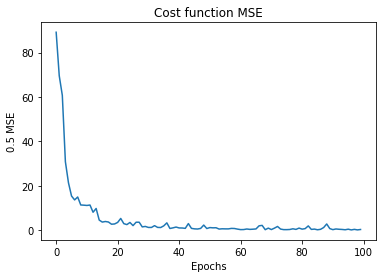

In [158]:
plt.plot(NNregression.costs)
plt.title("Cost function MSE")
plt.ylabel("0.5 MSE")
plt.xlabel("Epochs")

In [159]:
z_pred = NNregression.predict(X)

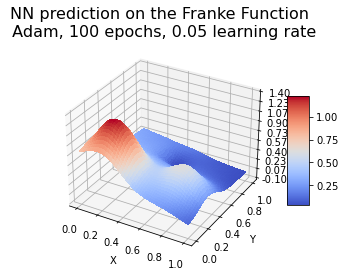

In [161]:
fn.frankeplot(z_pred.reshape(datapoints,datapoints), "NN prediction on the Franke Function \n Adam, 100 epochs, 0.05 learning rate")